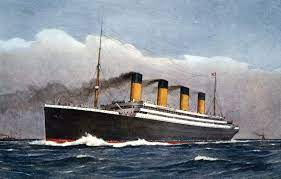

Description:
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


This dataset has been referred from Kaggle: https://www.kaggle.com/c/titanic/data.

Objective:
Understand the Dataset & cleanup.
Build classification model to predict weather the passenger survives or not.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [41]:
df.shape

(891, 12)

In [42]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [43]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
df.duplicated().sum()

0

In [50]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Figure size 720x720 with 0 Axes>

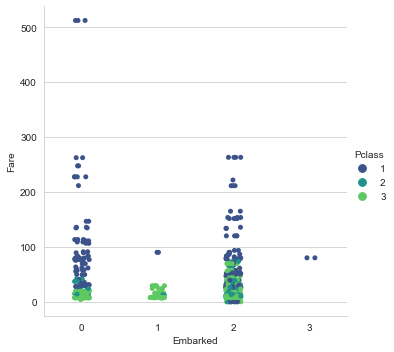

In [87]:
plt.figure(figsize=(10,10))
sns.catplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data = df, palette = 'viridis')

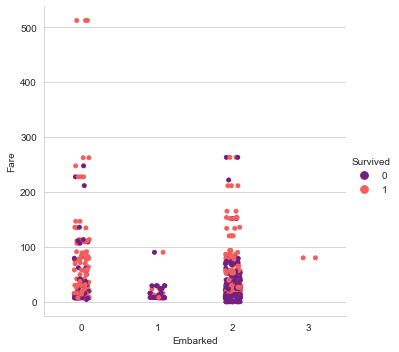

In [88]:
sns.catplot(x = 'Embarked', y = 'Fare', hue = 'Survived', data = df, palette = 'magma')


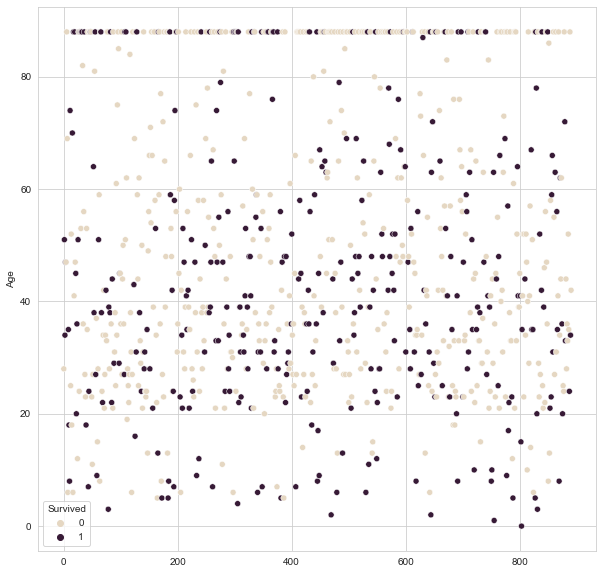

In [89]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, y = 'Age', x = np.arange(len(df['Age'])), hue = 'Survived', palette = 'ch:.25')
plt.show()

<Figure size 576x576 with 0 Axes>

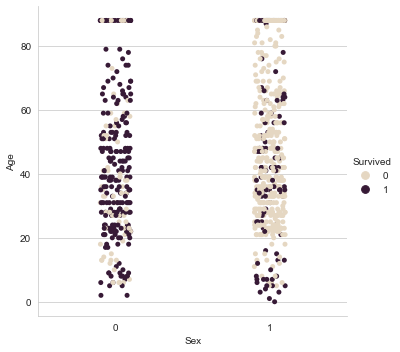

In [90]:
plt.figure(figsize=(8,8))
sns.catplot(x='Sex', y="Age",hue = 'Survived', data = df, palette = 'ch:.25')

In [91]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
df["Embarked"].fillna("s", inplace = True)

In [52]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
s      2
Name: Embarked, dtype: int64

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [54]:
round(df['Age'].mean())

30

In [55]:
df["Age"].fillna("round(df['Age'].mean())", inplace = True)

In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [57]:
df.drop('Cabin',axis=1,inplace=True)

In [58]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [59]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i]=df[i].astype('category').cat.codes

In [60]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int16
Sex               int8
Age               int8
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
Embarked          int8
dtype: object

# MACHINE LEARNING MODELS

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [62]:
x = df.drop('Survived',axis=1)
y = df['Survived']
print(x.shape)
print(y.shape)

(891, 10)
(891,)


In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


# Decision Tree Classifier

In [64]:
DT = DecisionTreeClassifier()
DT = DecisionTreeClassifier(max_depth=4)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
DT.score(x_test,y_test)
acc_DT=DT.score(x_test,y_test)
print("accuracy:",round(DT.score(x_test,y_test)*100),"%")

accuracy: 80 %


# Random Forest Classifier

In [65]:
RF = RandomForestClassifier(n_estimators=180)
RF.fit(x_train, y_train)
RF.score(x_test,y_test)
acc_rf=RF.score(x_test,y_test)
print("accuracy:",round(RF.score(x_test,y_test)*100),"%")

accuracy: 83 %


# Logistic Regression

In [66]:
Log_R = LogisticRegression(max_iter=10000,C=10)
Log_R.fit(x_train,y_train)
Log_R.score(x_test,y_test)
acc_lr=Log_R.score(x_test,y_test)
print("accuracy:",round(Log_R.score(x_test,y_test)*100),"%")

accuracy: 82 %


# KNN

In [67]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)
acc_knn=knn.score(x_test,y_test)
print("accuracy:",round(knn.score(x_test,y_test)*100),"%")

accuracy: 69 %


# Support Vector Classifier

In [68]:
svc = SVC(C=1)
svc.fit(x_train, y_train)
svc.score(x_test,y_test)
acc_svc=svc.score(x_test,y_test)
print("accuracy:",round(svc.score(x_test,y_test)*100),"%")

accuracy: 68 %


# Naive_Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
NB.score(x_test,y_test)
acc_NB=NB.score(x_test,y_test)
print("accuracy:",round(NB.score(x_test,y_test)*100),"%")

accuracy: 79 %


# GradientBoostingRegressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 42)
GB.fit(x_train, y_train)
GB.score(x_test,y_test)
acc_gb=GB.score(x_test,y_test)
print("accuracy:",round(GB.score(x_test,y_test)*100),"%")
  

accuracy: 42 %


In [71]:
import pandas as pd
models = pd.DataFrame({
    'Classification Models': ['Logistic Regression', 'Random Forest', 'Decision tree classifier', 'K Neierest Neighbour',"Support Vector Classifier",'Gradient Booster','Naive Bayes classifiers'],
    'accuracy Score': [acc_lr*100, acc_rf*100, acc_DT*100, acc_knn*100,acc_svc*100,acc_gb*100,acc_NB*100]})
models.sort_values(by='accuracy Score', ascending=False)

Classification Models  accuracy Score
1              Random Forest       83.240223
0        Logistic Regression       82.122905
2   Decision tree classifier       79.888268
6    Naive Bayes classifiers       78.770950
3       K Neierest Neighbour       68.715084
4  Support Vector Classifier       67.597765
5           Gradient Booster       42.143663

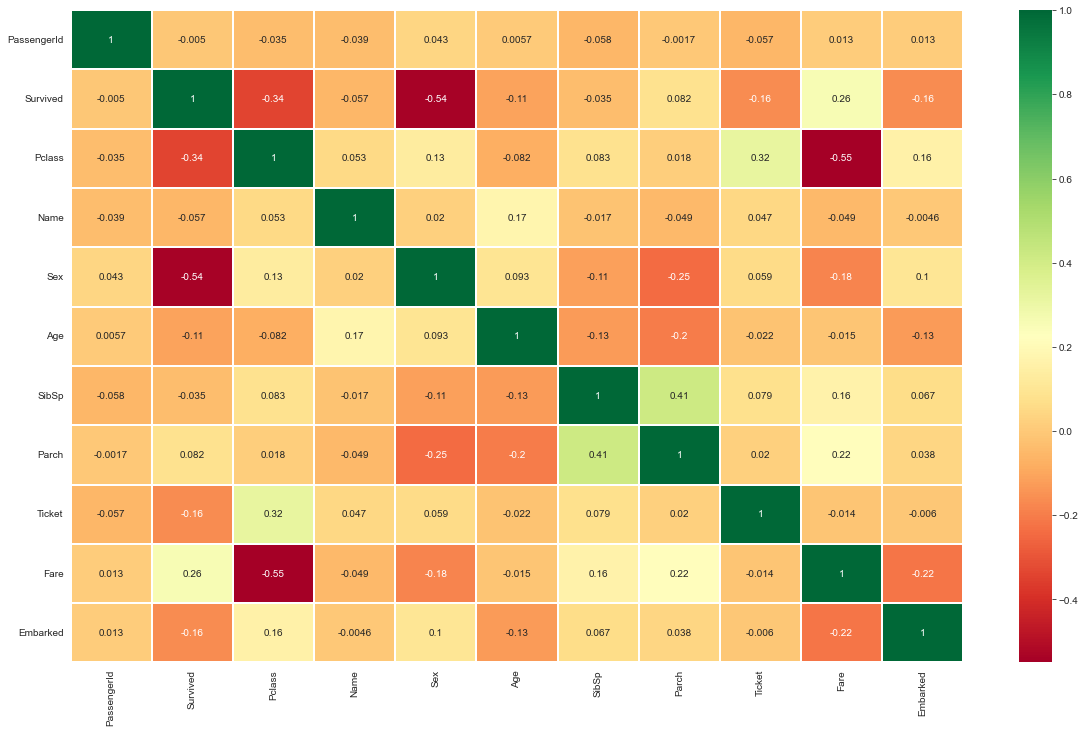

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

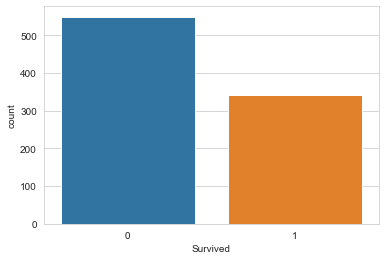

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

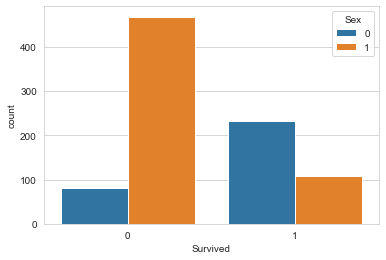

In [74]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

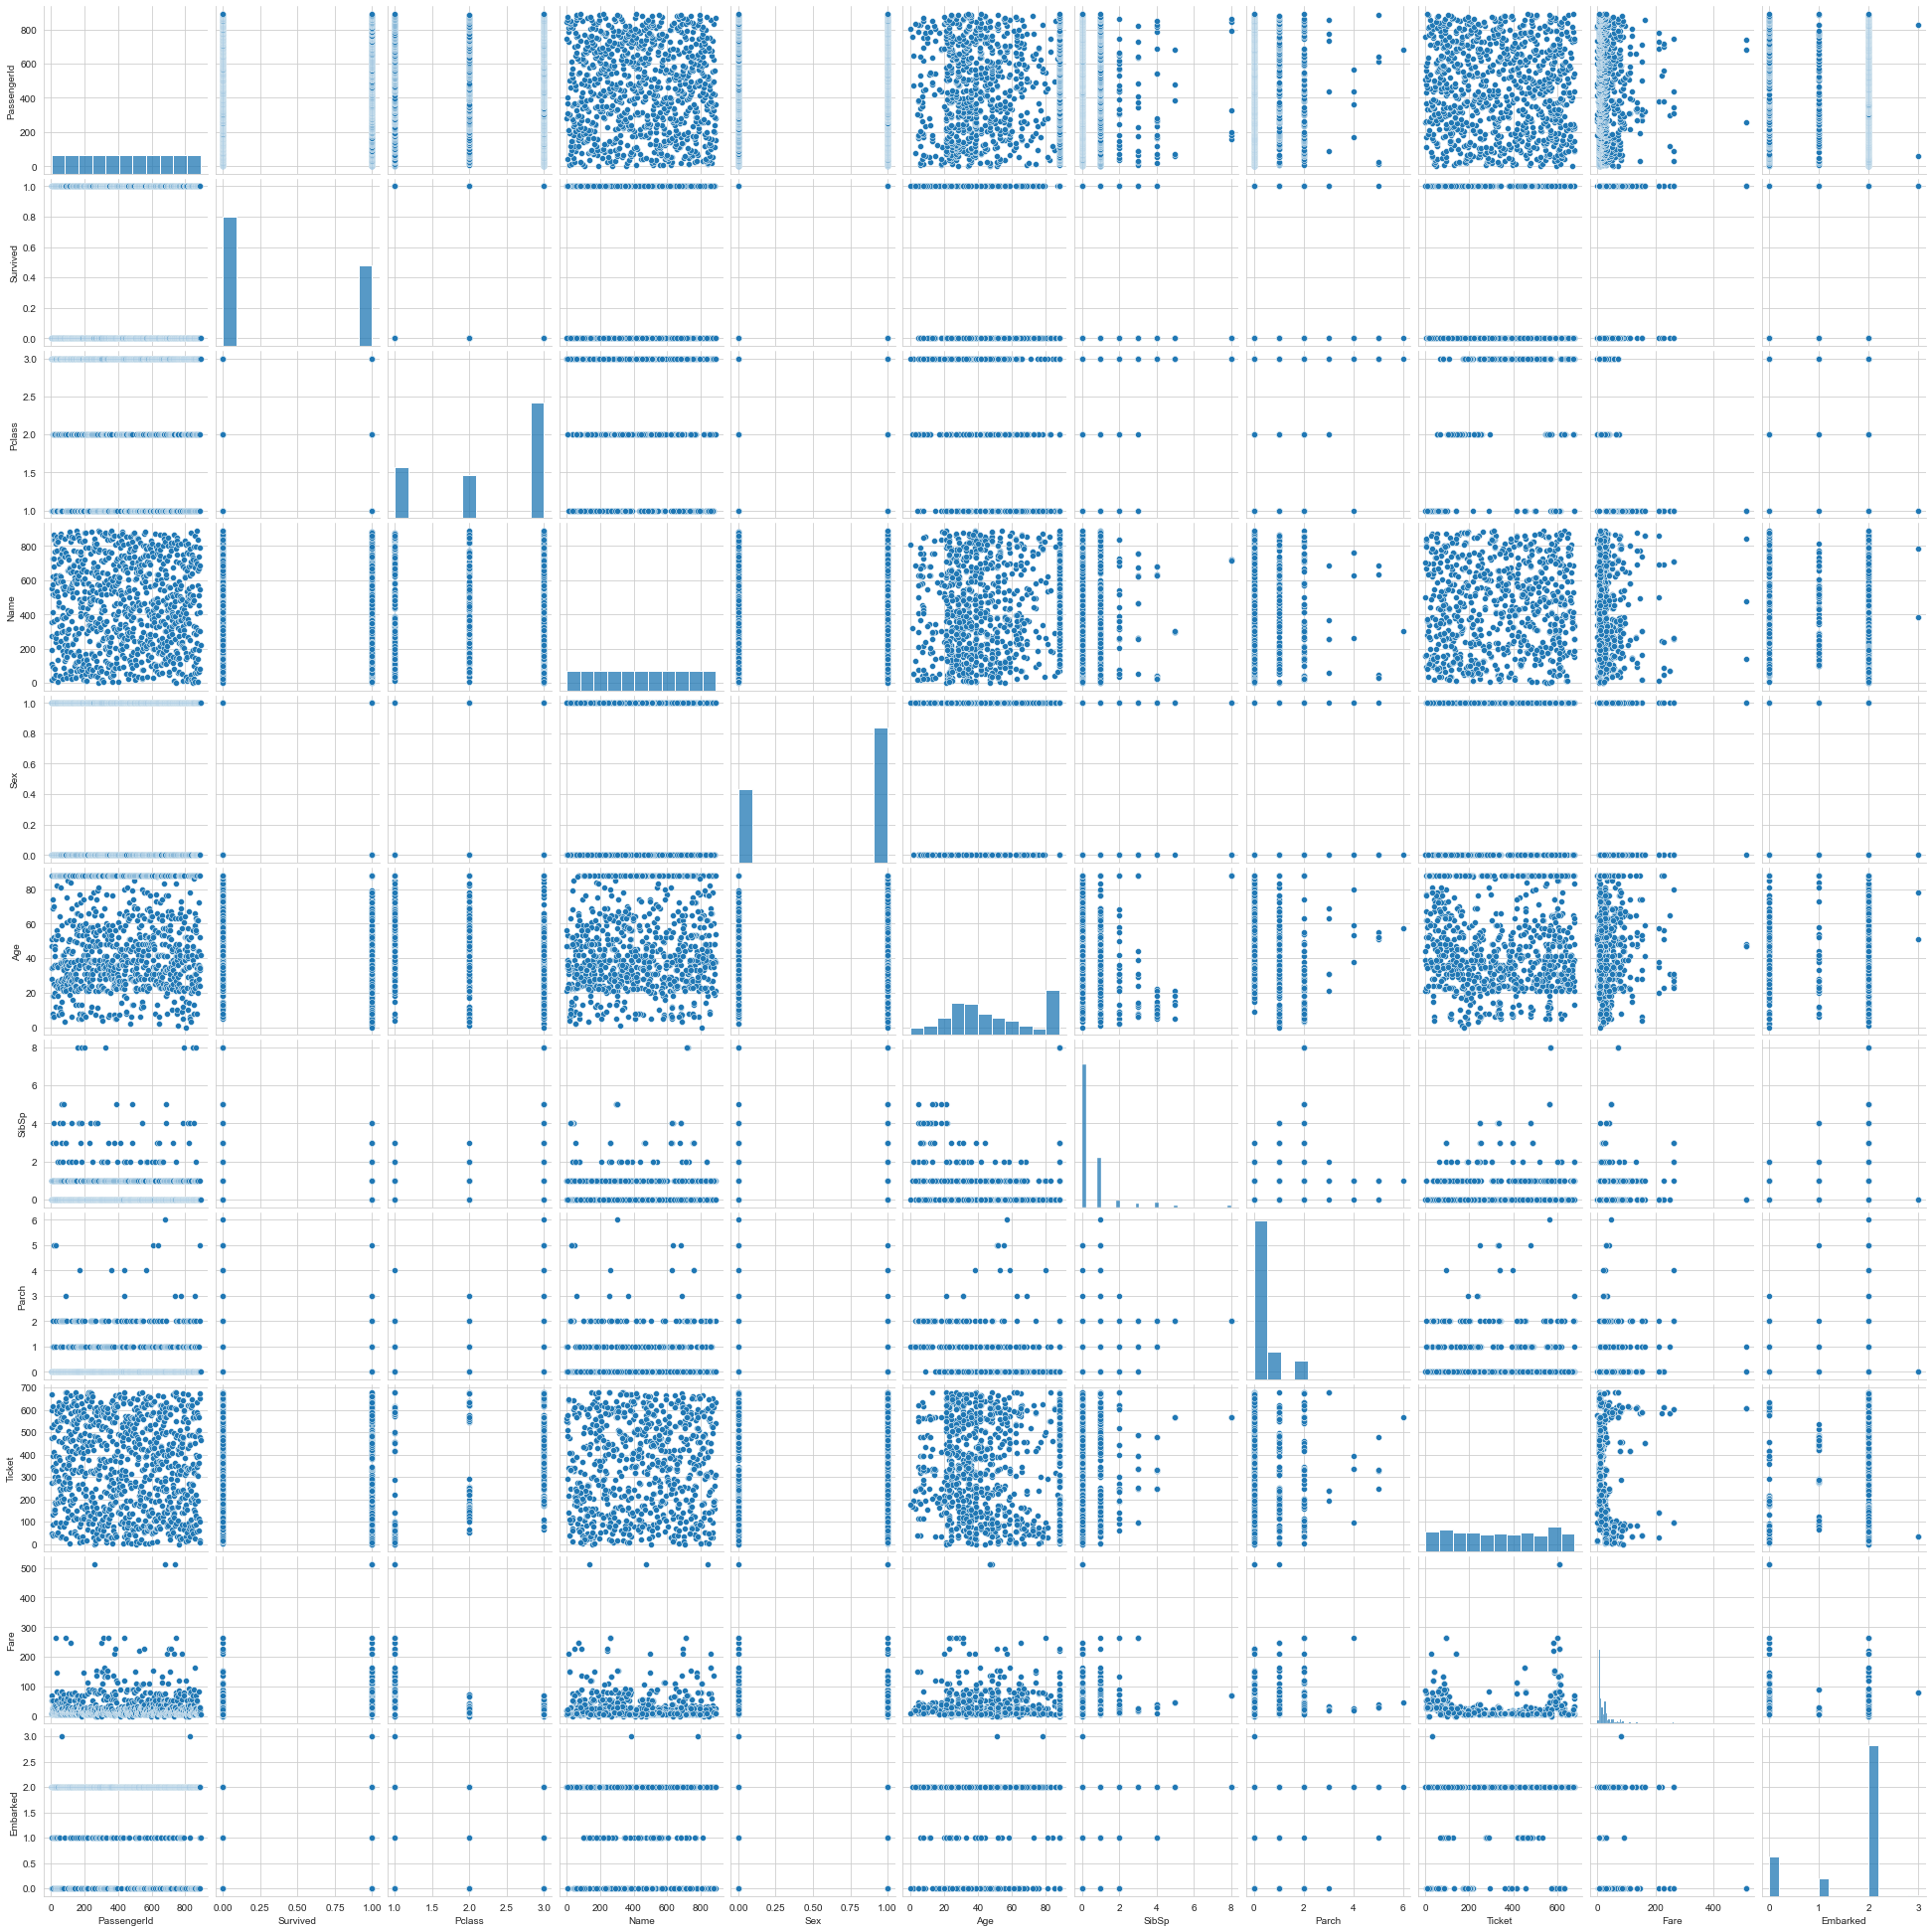

In [77]:
sns.pairplot(df)
plt.show()